In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP2 - 1er cuatri 2021
En esta carpeta de Jupyter vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Métodos
Los métodos evaluados en este notebook son los siguientes:

- **VMC** : vecino mas cercano
- **AGM** : arbol generador minimo
- **I** : incersion

# Experimentos
Leemos el dataframe con todos los resultados.

In [237]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage
0,berlin52,52,AGM-TS1,5.75046,10402.0,50,50,50,5
1,berlin52,52,AGM-TS1,5.45058,10402.0,100,50,50,5
2,berlin52,52,AGM-TS1,5.54075,10402.0,200,50,50,5
3,berlin52,52,AGM-TS1,15.77830,9896.0,50,50,50,30
4,berlin52,52,AGM-TS1,15.72100,9896.0,100,50,50,30
...,...,...,...,...,...,...,...,...,...
862,berlin52,52,I-TS2,567.20800,8370.0,100,1000,300,50
863,berlin52,52,I-TS2,572.98400,8497.0,200,1000,300,50
864,berlin52,52,I-TS2,1016.90000,7866.0,50,1000,300,100
865,berlin52,52,I-TS2,1023.09000,7887.0,100,1000,300,100


In [179]:
df_resultados["metodo"].unique()

array(['AGM-TS1', 'AGM-TS2', 'VMC-TS1', 'VMC-TS2', 'I-TS1', 'I-TS2',
       'AGM', 'VMC', 'I'], dtype=object)

# Buscar parametros optimos tabu

## VMC

In [180]:
df_vmc = df_resultados[(df_resultados["metodo"]== "VMC" ) & (df_resultados["dataset"] == "berlin52")].copy();
df_vmc.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage
649,berlin52,52,VMC,0.077672,8980.0,0,0,0,0


In [181]:
df_tabu_vmc = df_resultados[(df_resultados["metodo"]== "VMC-TS1" ) & (df_resultados["dataset"] == "berlin52")].copy();
df_tabu_vmc.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage
758,berlin52,52,VMC-TS1,1007.34000,7778.0,200,1000,300,100
734,berlin52,52,VMC-TS1,966.83400,7820.0,200,1000,50,100
733,berlin52,52,VMC-TS1,931.25400,7825.0,100,1000,50,100
756,berlin52,52,VMC-TS1,945.29000,7827.0,50,1000,300,100
744,berlin52,52,VMC-TS1,1003.49000,7835.0,50,1000,100,100
...,...,...,...,...,...,...,...,...,...
288,berlin52,52,VMC-TS1,52.28100,8980.0,50,500,50,5
281,berlin52,52,VMC-TS1,63.01940,8980.0,200,200,300,30
280,berlin52,52,VMC-TS1,62.49820,8980.0,100,200,300,30
278,berlin52,52,VMC-TS1,21.41290,8980.0,200,200,300,5


In [182]:
df_tabu_vmc = df_resultados[(df_resultados["metodo"]== "VMC-TS2" ) & (df_resultados["dataset"] == "berlin52")].copy();
df_tabu_vmc.sort_values(by=['costo'],ascending=True)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage
769,berlin52,52,VMC-TS2,976.03900,7767.0,100,1000,50,100
792,berlin52,52,VMC-TS2,967.88900,7774.0,50,1000,300,100
768,berlin52,52,VMC-TS2,978.37200,7776.0,50,1000,50,100
770,berlin52,52,VMC-TS2,983.35800,7788.0,200,1000,50,100
794,berlin52,52,VMC-TS2,980.73000,7849.0,200,1000,300,100
...,...,...,...,...,...,...,...,...,...
763,berlin52,52,VMC-TS2,354.63500,8980.0,100,1000,50,30
350,berlin52,52,VMC-TS2,5.72820,8980.0,200,50,300,5
338,berlin52,52,VMC-TS2,5.45385,8980.0,200,50,100,5
398,berlin52,52,VMC-TS2,53.72110,8980.0,200,500,50,5


## GAP

In [183]:
## gap = costo / optimo * 100 - 100 = gap
def gap(costo, optimo):
    return int(costo / optimo * 100 - 100)

dic_optimos = {'ch150': 6528, 'berlin52': 7542}

df_gap = df_resultados[(df_resultados["dataset"] == "berlin52") | (df_resultados["dataset"] == "ch150")].copy();
#df_gap.drop(df_gap.columns[[5,6,7,8]], axis=1, inplace=True)
list_gap = []
list_optimo = []
for index, row in df_gap.iterrows():
    costo = int(row['costo'])
    optimo = dic_optimos[row['dataset']]
    value_gap = (costo - optimo) / optimo 
    list_optimo.append(dic_optimos[row['dataset']])
    list_gap.append(value_gap)


df_gap['optimo'] = list_optimo
df_gap['gap'] = list_gap
df_gap

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
0,berlin52,52,AGM-TS1,5.75046,10402.0,50,50,50,5,7542,0.379210
1,berlin52,52,AGM-TS1,5.45058,10402.0,100,50,50,5,7542,0.379210
2,berlin52,52,AGM-TS1,5.54075,10402.0,200,50,50,5,7542,0.379210
3,berlin52,52,AGM-TS1,15.77830,9896.0,50,50,50,30,7542,0.312119
4,berlin52,52,AGM-TS1,15.72100,9896.0,100,50,50,30,7542,0.312119
...,...,...,...,...,...,...,...,...,...,...,...
862,berlin52,52,I-TS2,567.20800,8370.0,100,1000,300,50,7542,0.109785
863,berlin52,52,I-TS2,572.98400,8497.0,200,1000,300,50,7542,0.126624
864,berlin52,52,I-TS2,1016.90000,7866.0,50,1000,300,100,7542,0.042959
865,berlin52,52,I-TS2,1023.09000,7887.0,100,1000,300,100,7542,0.045744


In [ ]:
max_iter = [50,200,500,1000]
rang_iter = [50,100,300] # tiene sentido si es menor que max
porcentaje_vecinos = [10,30,70,100]
largo_lista = [50,100,200]

In [184]:
df_gap.sort_values(by=['gap'],ascending=True).head(30)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
698,berlin52,52,AGM-TS2,999.533,7702.0,200,1000,50,100,7542,0.021215
710,berlin52,52,AGM-TS2,1051.710,7747.0,200,1000,100,100,7542,0.027181
769,berlin52,52,VMC-TS2,976.039,7767.0,100,1000,50,100,7542,0.029833
721,berlin52,52,AGM-TS2,990.400,7772.0,100,1000,300,100,7542,0.030496
792,berlin52,52,VMC-TS2,967.889,7774.0,50,1000,300,100,7542,0.030761
768,berlin52,52,VMC-TS2,978.372,7776.0,50,1000,50,100,7542,0.031026
758,berlin52,52,VMC-TS1,1007.340,7778.0,200,1000,300,100,7542,0.031291
708,berlin52,52,AGM-TS2,986.053,7780.0,50,1000,100,100,7542,0.031557
828,berlin52,52,I-TS1,976.292,7783.0,50,1000,300,100,7542,0.031954
770,berlin52,52,VMC-TS2,983.358,7788.0,200,1000,50,100,7542,0.032617


# VMC

In [209]:
df = df_gap[df_gap["metodo"] == "VMC-TS1"]
df.sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
758,berlin52,52,VMC-TS1,1007.340,7778.0,200,1000,300,100,7542,0.031291
734,berlin52,52,VMC-TS1,966.834,7820.0,200,1000,50,100,7542,0.036860
733,berlin52,52,VMC-TS1,931.254,7825.0,100,1000,50,100,7542,0.037523


In [185]:
df = df_gap[df_gap["metodo"] == "VMC-TS1"]
df[df["percentage"]==50].sort_values(by=['gap'],ascending=True).head(3)


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
295,berlin52,52,VMC-TS1,241.857,8180.0,100,500,50,50,7542,0.084593
729,berlin52,52,VMC-TS1,523.298,8298.0,50,1000,50,50,7542,0.100239
755,berlin52,52,VMC-TS1,532.349,8379.0,200,1000,300,50,7542,0.110979


In [188]:
df[df["percentage"]==100].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
758,berlin52,52,VMC-TS1,1007.340,7778.0,200,1000,300,100,7542,0.031291
734,berlin52,52,VMC-TS1,966.834,7820.0,200,1000,50,100,7542,0.036860
733,berlin52,52,VMC-TS1,931.254,7825.0,100,1000,50,100,7542,0.037523


## Tabu search con memoria de ciclos

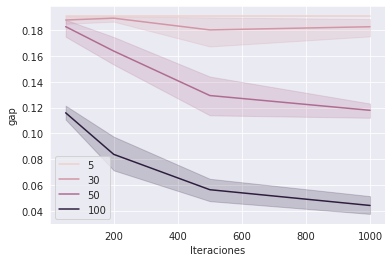

In [189]:
sns.set_style("darkgrid")

df = df_gap[df_gap["metodo"] == "VMC-TS1"]

sns.lineplot(data = df, x = "max_iter",y = "gap",hue = "percentage")
plt.legend(loc='lower left')

plt.xlabel('Iteraciones')

plt.show()

## Tabu search con memoria de movimientos

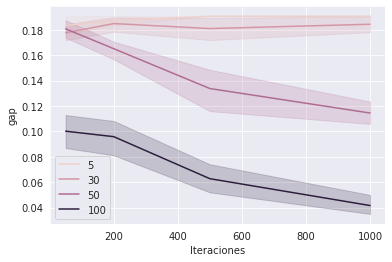

In [216]:
sns.set_style("darkgrid")

df = df_gap[df_gap["metodo"] == "VMC-TS2"]

sns.lineplot(data = df ,x = "max_iter",y = "gap",hue = "percentage" )

plt.legend(loc='lower left')

plt.xlabel('Iteraciones')

plt.show()

In [214]:
df = df_gap[df_gap["metodo"] == "VMC-TS2"]
df[df["percentage"]==50].sort_values(by=['gap'],ascending=True).head(3)


,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
427,berlin52,52,VMC-TS2,248.129,8152.0,100,500,300,50,7542,0.080880
765,berlin52,52,VMC-TS2,530.861,8186.0,50,1000,50,50,7542,0.085388
779,berlin52,52,VMC-TS2,546.053,8348.0,200,1000,100,50,7542,0.106868


In [215]:
df = df_gap[df_gap["metodo"] == "VMC-TS2"]
df[df["percentage"]==100].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
769,berlin52,52,VMC-TS2,976.039,7767.0,100,1000,50,100,7542,0.029833
792,berlin52,52,VMC-TS2,967.889,7774.0,50,1000,300,100,7542,0.030761
768,berlin52,52,VMC-TS2,978.372,7776.0,50,1000,50,100,7542,0.031026


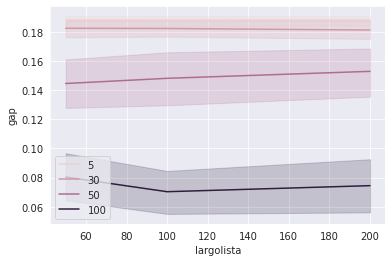

In [206]:
sns.set_style("darkgrid")

df = df_gap[df_gap["metodo"] == "VMC-TS2"]

sns.lineplot(data = df ,x = "largolista",y = "gap",hue = "percentage" )

plt.legend(loc='lower left')

plt.show()

##  AGM

## Tabu search con memoria de ciclos

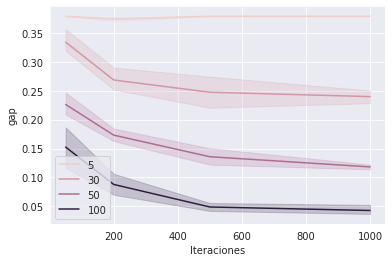

In [191]:
sns.set_style("darkgrid")

df = df_gap[df_gap["metodo"] == "AGM-TS1"]

sns.lineplot(data = df, x = "max_iter",y = "gap",hue = "percentage")
plt.legend(loc='lower left')

plt.xlabel('Iteraciones')

plt.show()

In [220]:
df = df_gap[df_gap["metodo"] == "AGM-TS1"]

df[( df["percentage"]== 100 )].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
662,berlin52,52,AGM-TS1,1052.080,7796.0,200,1000,50,100,7542,0.033678
686,berlin52,52,AGM-TS1,994.117,7801.0,200,1000,300,100,7542,0.034341
674,berlin52,52,AGM-TS1,976.967,7807.0,200,1000,100,100,7542,0.035137


In [221]:
df = df_gap[df_gap["metodo"] == "AGM-TS1"]

df[( df["percentage"]== 50 )].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
80,berlin52,52,AGM-TS1,252.205,8241.0,200,500,50,50,7542,0.092681
670,berlin52,52,AGM-TS1,542.842,8353.0,100,1000,100,50,7542,0.107531
681,berlin52,52,AGM-TS1,524.025,8374.0,50,1000,300,50,7542,0.110316


## Tabu search con memoria de movimientos

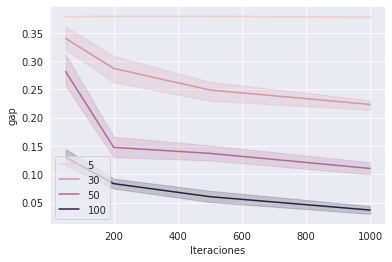

In [193]:
sns.set_style("darkgrid")

df = df_gap[df_gap["metodo"] == "AGM-TS2"]

sns.lineplot(data = df, x = "max_iter",y = "gap",hue = "percentage")
plt.legend(loc='lower left')

plt.xlabel('Iteraciones')

plt.show()

In [ ]:
sns.set_style("darkgrid")

df = df_gap[df_gap["metodo"] == "AGM-TS1"]

sns.lineplot(data = df, x = "max_iter",y = "gap",hue = "percentage")
plt.legend(loc='lower left')

plt.xlabel('Iteraciones')

plt.show()

In [224]:
df = df_gap[df_gap["metodo"] == "AGM-TS2"]

df[( df["percentage"]== 50 )].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
694,berlin52,52,AGM-TS2,553.796,8199.0,100,1000,50,50,7542,0.087112
718,berlin52,52,AGM-TS2,532.236,8241.0,100,1000,300,50,7542,0.092681
706,berlin52,52,AGM-TS2,553.394,8290.0,100,1000,100,50,7542,0.099178


In [223]:
df = df_gap[df_gap["metodo"] == "AGM-TS2"]

df[( df["percentage"]== 100 )].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
698,berlin52,52,AGM-TS2,999.533,7702.0,200,1000,50,100,7542,0.021215
710,berlin52,52,AGM-TS2,1051.710,7747.0,200,1000,100,100,7542,0.027181
721,berlin52,52,AGM-TS2,990.400,7772.0,100,1000,300,100,7542,0.030496


In [226]:
df[( df["percentage"]== 100 )& (df["max_iter"] == 500)].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
214,berlin52,52,AGM-TS2,458.493,7831.0,100,500,300,100,7542,0.038319
201,berlin52,52,AGM-TS2,458.043,7869.0,50,500,100,100,7542,0.043357
189,berlin52,52,AGM-TS2,459.539,7893.0,50,500,50,100,7542,0.046539


## Insercion

## Tabu search con memoria de ciclos

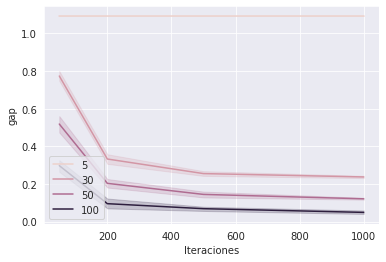

In [194]:
sns.set_style("darkgrid")

df = df_gap[df_gap["metodo"] == "I-TS1"]

g = sns.lineplot(data = df, x = "max_iter",y = "gap",hue = "percentage")
plt.legend(loc='lower left')
plt.xlabel('Iteraciones')
plt.show()

In [230]:
df = df_gap[df_gap["metodo"] == "I-TS1"]

df[( df["percentage"]== 100 )].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
828,berlin52,52,I-TS1,976.292,7783.0,50,1000,300,100,7542,0.031954
818,berlin52,52,I-TS1,1000.340,7803.0,200,1000,100,100,7542,0.034606
805,berlin52,52,I-TS1,980.872,7813.0,100,1000,50,100,7542,0.035932


In [231]:
df = df_gap[df_gap["metodo"] == "I-TS1"]

df[( df["percentage"]== 50 )].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
510,berlin52,52,I-TS1,269.896,8265.0,50,500,50,50,7542,0.095863
802,berlin52,52,I-TS1,558.794,8399.0,100,1000,50,50,7542,0.113630
815,berlin52,52,I-TS1,561.208,8402.0,200,1000,100,50,7542,0.114028


In [233]:
df = df_gap[df_gap["metodo"] == "I-TS1"]

df[( df["percentage"]== 100 )& (df["max_iter"] == 500)].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
526,berlin52,52,I-TS1,472.808,7841.0,100,500,100,100,7542,0.039645
538,berlin52,52,I-TS1,472.853,7875.0,100,500,300,100,7542,0.044153
514,berlin52,52,I-TS1,478.477,8013.0,100,500,50,100,7542,0.062450


## Tabu search con memoria de movimientos

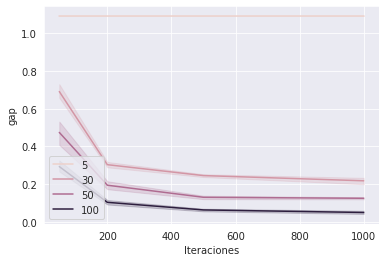

In [195]:
sns.set_style("darkgrid")

df = df_gap[df_gap["metodo"] == "I-TS2"]

sns.lineplot(data = df, x = "max_iter",y = "gap",hue = "percentage")
plt.legend(loc='lower left')
plt.xlabel('Iteraciones')

plt.show()

In [234]:
df = df_gap[df_gap["metodo"] == "I-TS2"]

df[( df["percentage"]== 100 )].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
866,berlin52,52,I-TS2,1022.08,7811.0,200,1000,300,100,7542,0.035667
840,berlin52,52,I-TS2,1022.68,7821.0,50,1000,50,100,7542,0.036993
864,berlin52,52,I-TS2,1016.90,7866.0,50,1000,300,100,7542,0.042959


In [236]:
df = df_gap[df_gap["metodo"] == "I-TS2"]

df[( df["percentage"]== 100 )& (df["max_iter"] == 500)].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
621,berlin52,52,I-TS2,487.416,7897.0,50,500,50,100,7542,0.047070
634,berlin52,52,I-TS2,490.039,7917.0,100,500,100,100,7542,0.049722
622,berlin52,52,I-TS2,490.432,7974.0,100,500,50,100,7542,0.057279


In [235]:
df = df_gap[df_gap["metodo"] == "I-TS2"]

df[( df["percentage"]== 50 )].sort_values(by=['gap'],ascending=True).head(3)

,dataset,n,metodo,tiempo,costo,largolista,max_iter,rang_iter,percentage,optimo,gap
644,berlin52,52,I-TS2,287.909,8284.0,200,500,300,50,7542,0.098382
862,berlin52,52,I-TS2,567.208,8370.0,100,1000,300,50,7542,0.109785
849,berlin52,52,I-TS2,560.128,8403.0,50,1000,100,50,7542,0.114161
